In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
import attr
import bz2
import ujson
import os
import umap
import math

import numpy as np
import altair as alt
import pandas as pd

from glob import glob
from tqdm import tqdm

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from itertools import islice
from scipy.cluster.hierarchy import linkage, dendrogram

In [21]:
@attr.s
class Dataset:
    
    root = attr.ib()
    
    def paths(self):
        return glob(os.path.join(self.root, '*.bz2'))
    
    def novels(self):
        for path in tqdm(self.paths()):
            with bz2.open(path) as fh:
                for line in fh:
                    yield ujson.loads(line)

In [22]:
ds = Dataset('../../data/top200-4bins.json/')

In [23]:
novels = list(ds.novels())

100%|██████████| 10/10 [00:20<00:00,  2.09s/it]


In [99]:
len(counts)

19723

In [85]:
def cluster_by_token(token, n_clusters=4, min_count=50000):
    
    counts = np.array([
        n['counts'][token] for n in novels
        if n['word_count'] > min_count and min(n['counts'][token])
    ])
    
    counts = counts / counts.mean(1, keepdims=True)
    
    model = AgglomerativeClustering(n_clusters=n_clusters)
    model.fit(counts)
    
    return counts, model

In [86]:
a_counts, a_model = cluster_by_token('a')

In [87]:
the_counts, the_model = cluster_by_token('the')

In [91]:
def plot_clusters(counts, model):
    
    plt.figure(figsize=(10,6))

    for cid in np.unique(model.labels_):
        series = counts[model.labels_==cid]
        plt.plot(series.mean(0), label=len(series))

    plt.legend()

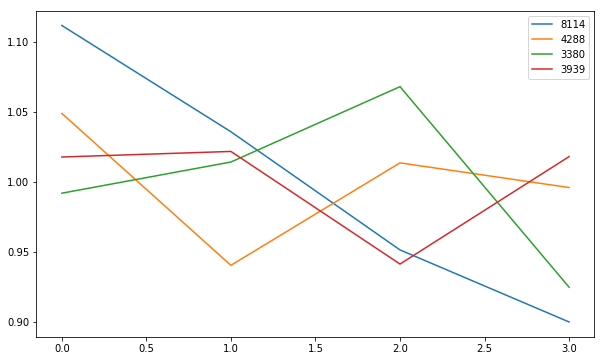

In [92]:
plot_clusters(a_counts, a_model)

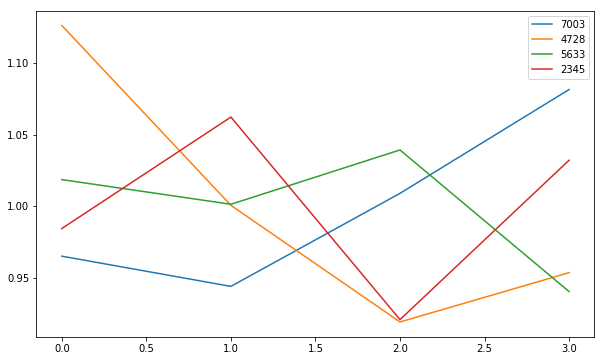

In [93]:
plot_clusters(the_counts, the_model)